In [5]:
 import pandas as pd
df=pd.read_csv("rows.csv")

In [7]:
df.head()

,index,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date,Location
0,0,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,82,11,NaN,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,2,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Emergency Department,ED_1b,ED1,248,1238,2 - Data submitted were based on a sample of c...,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,3,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Emergency Department,ED_2b,ED2,69,1115,2 - Data submitted were based on a sample of c...,07/01/2014,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
4,4,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Emergency Department,EDV,Emergency department volume,"Very High (60,000+ patients annually)",NaN,NaN,01/01/2013,12/31/2013,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"


In [9]:
df.info()
#df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180763 entries, 0 to 180762
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   index               180763 non-null  int64 
 1   Provider ID         180763 non-null  object
 2   Hospital Name       180763 non-null  object
 3   Address             180763 non-null  object
 4   City                180763 non-null  object
 5   State               180763 non-null  object
 6   ZIP Code            180763 non-null  int64 
 7   County Name         180330 non-null  object
 8   Phone Number        180763 non-null  int64 
 9   Condition           180763 non-null  object
 10  Measure ID          180763 non-null  object
 11  Measure Name        180763 non-null  object
 12  Score               180763 non-null  object
 13  Sample              176125 non-null  object
 14  Footnote            139495 non-null  object
 15  Measure Start Date  180763 non-null  object
 16  Me

In [11]:
## DATA CLEAN & PREPROCESSING
df.isnull().sum().sort_values(ascending=False)

Footnote              41268
Sample                 4638
County Name             433
index                     0
Measure ID                0
Measure End Date          0
Measure Start Date        0
Score                     0
Measure Name              0
Condition                 0
Provider ID               0
Phone Number              0
ZIP Code                  0
State                     0
City                      0
Address                   0
Hospital Name             0
Location                  0
dtype: int64

In [13]:
##drop UNNECESSORY COLUMNS
df_class=df.drop(columns=['Footnote','Sample','County Name','index','Measure End Date','Measure Start Date','Provider ID','Phone Number','ZIP Code',
                          'State','City','Address','Hospital Name','Location'],errors='ignore')

In [15]:
df_class=df_class.dropna().reset_index(drop=True)

In [17]:
df_class.columns=df_class.columns.str.strip().str.lower().str.replace(' ','_',regex=False) ##STANDARDIZE COLUMNS

In [19]:
print(df_class.columns)

Index(['condition', 'measure_id', 'measure_name', 'score'], dtype='object')


In [21]:
df_class.dtypes

condition       object
measure_id      object
measure_name    object
score           object
dtype: object

In [23]:
for col in df_class.columns:
    print(f"{col}-Unique values:{df_class[col].nunique()}")

condition-Unique values:10
measure_id-Unique values:41
measure_name-Unique values:41
score-Unique values:588


In [25]:
##outlier Detection
df_class['score']=pd.to_numeric(df_class['score'],errors='coerce')
df_class=df_class.dropna(subset=['score'])

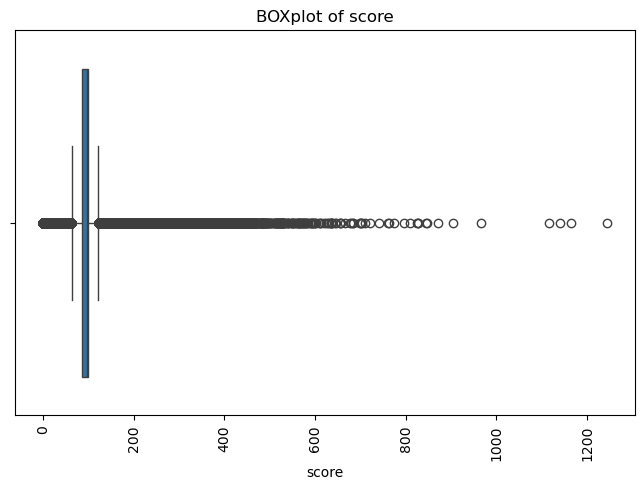

In [27]:
##HANDLE OUTLIERS
#BOX PLOT FOR ALL nUMERIC COLUMNS
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.boxplot(data=df_class,x='score')
plt.xticks(rotation=90)
plt.title("BOXplot of score")
plt.show()


In [41]:
df_class['score']=pd.to_numeric(df_class['score'],errors='coerce')
df_class=df_class.dropna(subset=['score'])

In [43]:
#remove outliers apply IQR method
Q1=df_class['score'].quantile(0.25)
Q3=df_class['score'].quantile(0.75)
IQR=Q3-Q1
#filter the dataframe to remove outliers
df_class=df_class[(df_class['score'] >=(Q1 - 1.5 * IQR)) & (df_class['score']<= (Q3 + 1.5 * IQR))]

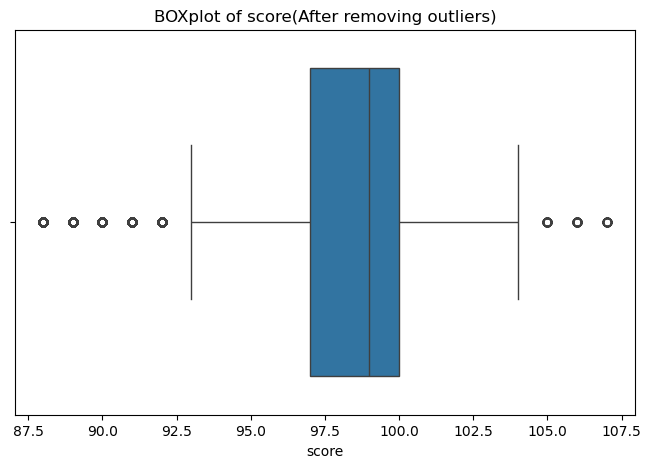

In [45]:
#REPLOT THE BOX PLOT OF SCORE
plt.figure(figsize=(8,5))
sns.boxplot(data=df_class,x='score')
plt.title("BOXplot of score(After removing outliers)")
plt.show()

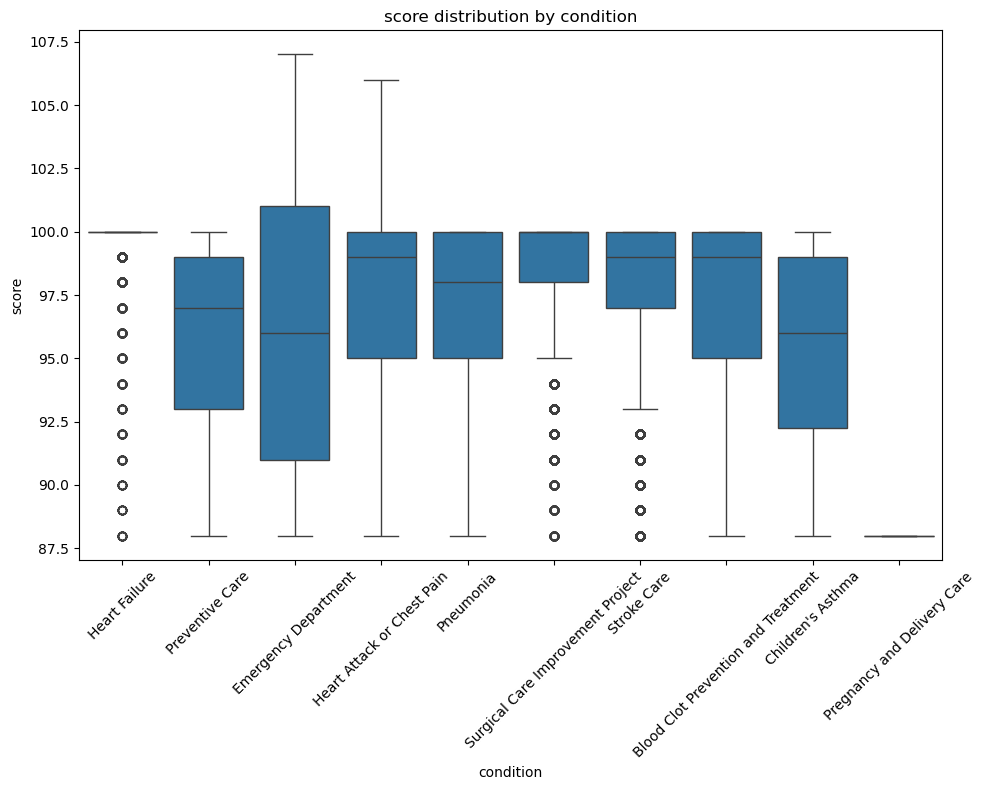

In [35]:
##visualization
#1. BOX PLOT OF SCORE BY CONDITION
plt.figure(figsize=(10,8))
sns.boxplot(x='condition',y='score',data=df_class)
plt.xticks(rotation=45)
plt.title("score distribution by condition")
plt.tight_layout()
plt.show()

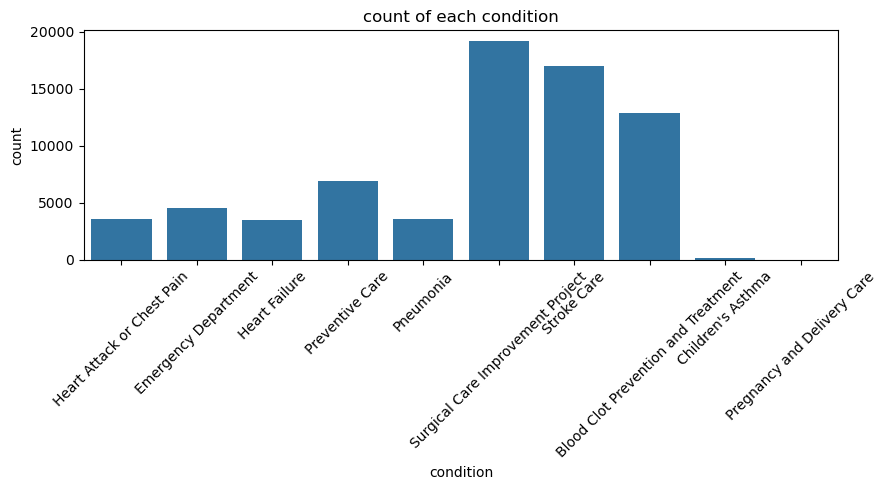

In [35]:
# 2.COUNT PLOT OF CONDITIONS
#which medical condition appears the most
plt.figure(figsize=(9,5))
sns.countplot(data=df_class,x='condition')
plt.xticks(rotation=45)
plt.title("count of each condition")
plt.tight_layout()
plt.show()  
  

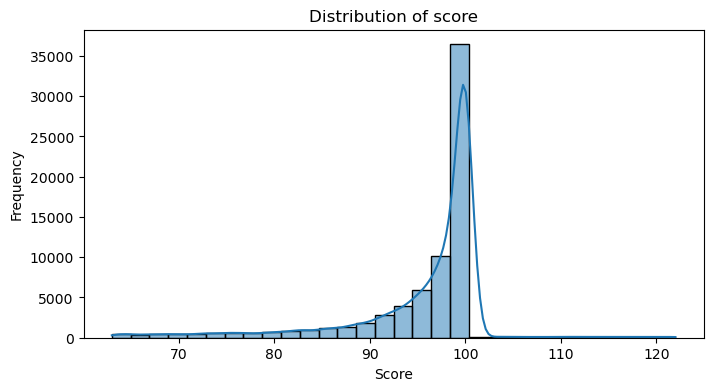

In [39]:
#3.HISTOGRAM OF SCORE
plt.figure(figsize=(8,4))
sns.histplot(df_class['score'],bins=30,kde=True)
plt.title("Distribution of score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()  

In [37]:
#convert score to numeric
df_class['score']=pd.to_numeric(df_class['score'],errors='coerce')
df_class=df_class.dropna(subset=['score'])
#create 5 bins and label them
bins=[0,20,40,60,80,100]
labels=['very low','low','medium','high','very high']
df_class['score_category']=pd.cut(df_class['score'],bins=bins,labels=labels)

In [39]:
df_class=df_class.drop('score',axis=1)

In [41]:
##MODEL CREATION
##ENCODE CATEGORICAL COLUMNS
from sklearn.preprocessing import LabelEncoder
# Make a copy
df_encoded = df_class.copy()
df_encoded=df_encoded.dropna()
le=LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
 df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()  

,condition,measure_id,measure_name,score_category
1,3,1,26,very high
3,2,4,9,high
5,4,5,10,very high
6,7,6,18,very high
7,7,7,14,very high


In [43]:
#SPLIT INTO FEATURES(x)AND TARGET(Y)
X = df_encoded.drop('score_category', axis=1)
y = df_encoded['score_category']

In [45]:
##TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#check the shape of the data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((56058, 3), (14015, 3), (56058,), (14015,))

In [47]:
#MODEL CREATION
#Train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
rf_accuracy=rf_model.score(X_test, y_test)
print("Random Forest Accuracy Score:", rf_accuracy)

Random Forest Accuracy Score: 0.9449161612557974


In [51]:
#DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Model training
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [53]:
dt_accuracy = dt_model.score(X_test,y_test)
print("decision tree Accuracy Score:", dt_accuracy)

decision tree Accuracy Score: 0.944987513378523


In [55]:
#COMPARE BOTH
# Compare results
print("Model Accuracy Comparison:")
print(f"Decision Tree Classifier: {dt_accuracy:.4f}")
print(f"Random Forest Classifier: {rf_accuracy:.4f}")

Model Accuracy Comparison:
Decision Tree Classifier: 0.9450
Random Forest Classifier: 0.9449


In [ ]:
#RANDOM FOREST CLASSIFIER IS BEST MODEL TO GO WITH, GIVEN IS SLIGHTLY HIGHER ACCURACY AND INHERENT ADVANTAGES OF USING AN ENSEMBLE METHOD.